In [36]:
import pandas as pd
import numpy as np
import missingno as msno


In [37]:
ames = pd.read_csv('/Users/jamesopacich/Documents/dsi/projects/project_2/starter_data/train.csv')

In [38]:
ames.iloc[:, 41:60].head()

,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type
0,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd
1,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd
2,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd
3,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn
4,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd


In [39]:
ames.shape

(2051, 81)

##### Change column names to lower and _

In [40]:
ames.columns = ames.columns.str.lower().str.replace(' ', '_')

In [41]:
ames.columns;

In [42]:
len(ames.columns)

81

### Combine sf columns and delete columns that overlap in purpose

In [43]:
ames.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [44]:
ames['ttl_sf'] = ames['total_bsmt_sf'] + ames['gr_liv_area']

In [45]:
ames['ttl_sf'].mean()

2557.612195121951

In [46]:
overlap_sf = ['bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area']

In [47]:
ames.drop(columns = overlap_sf, inplace = True)

In [48]:
len(ames.columns)

74

### Combine bathrooms and drop overlapping columns

In [49]:
ames['ttl_bath'] = ames['full_bath'] + (.5 * ames['half_bath']) + ames['bsmt_full_bath'] + (.5 * ames['bsmt_half_bath'])

In [50]:
ames['ttl_bath'].head()

0    2.5
1    3.5
2    2.0
3    2.5
4    2.0
Name: ttl_bath, dtype: float64

In [51]:
ames.drop(columns = ['full_bath', 'half_bath', 'bsmt_full_bath', 'bsmt_half_bath'], inplace = True)

### Drop totrmsabvgrnd because it is redundant with count of bedrooms and kitchens

##### Make copies of dataframe in 20 column segments for easier cleaning

In [52]:
ames_1st_20 = ames.iloc[:, 0:20].copy()
ames_2nd_20 = ames.iloc[:, 20:40].copy()
ames_3rd_20 = ames.iloc[:, 40:60].copy()
ames_4th_20 = ames.iloc[:, 60:81].copy()

In [53]:
len(ames_1st_20.columns)

20

In [54]:
def mass_value(df):
    # function that takes in a dataframe and returns value_counts for all columns. 
    value_list = []
    for item in df.columns:
        value_list.append(item.upper())
        value_list.append(df[item].value_counts())
    return value_list
    

In [55]:
def fill_na_mean(df):
    #Cleans float and integer NaNs by replacing with mean
    for item in df.columns:
        if df[item].dtypes == float or df[item].dtypes == int:
            df[item].fillna(df[item].mean(), inplace = True)

In [56]:
def fill_na_mode(df):
    #Cleans float and integer NaNs by replacing with mean
    for item in df.columns:
        if df[item].dtypes == float or df[item].dtypes == int:
            df[item].fillna(df[item].mean(), inplace = True)

In [57]:
def fill_na_string(df):
    #Cleans string object NaNs by replacing with a string
    for item in df.columns:
        if df[item].dtypes == str or df[item].dtypes == object:
            df[item].fillna('no value', inplace = True)

In [58]:
def null_counter(series):
    count = 0

    for item in series.isnull():
        if item == True:
            count += 1
    return f'{count} null values' 

___________________________________________________
# Begin Cleaning on 1st 20 columns

In [59]:
ames_1st_20.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond'],
      dtype='object')

In [60]:
ames_1st_20.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8


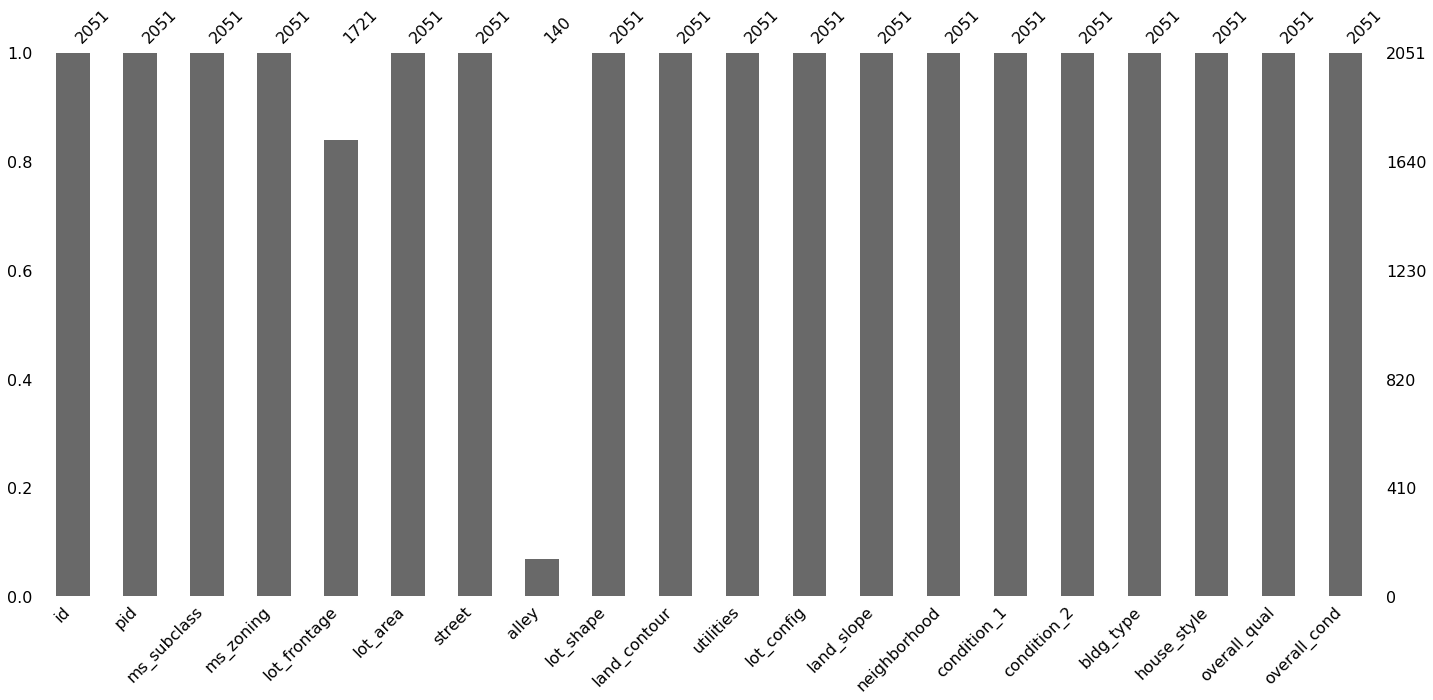

In [61]:
msno.bar(ames_1st_20);

###### replace null values in frontage with mean

In [62]:
ames_1st_20['lot_frontage'].fillna(ames_1st_20['lot_frontage'].mean(), inplace = True)

In [63]:

# call function null_counter. created above. It counts null values in a series
null_counter(ames_1st_20['lot_frontage'])

'0 null values'

### Drop Non_useful columns 
#### (Qualitatively examined. I may drop more quantitatively examined columns later)

In [64]:
mass_value(ames_1st_20)

['ID',
 2047    1
 2787    1
 1058    1
 1060    1
 1062    1
        ..
 2550    1
 2552    1
 505     1
 507     1
 2049    1
 Name: id, Length: 2051, dtype: int64,
 'PID',
 532351060    1
 535303150    1
 909250210    1
 905377130    1
 527403020    1
             ..
 535403150    1
 528477070    1
 528104080    1
 533120030    1
 533250050    1
 Name: pid, Length: 2051, dtype: int64,
 'MS_SUBCLASS',
 20     770
 60     394
 50     198
 120    132
 30     101
 70      90
 160     88
 80      86
 90      75
 190     46
 85      28
 75      16
 45      11
 180     11
 40       4
 150      1
 Name: ms_subclass, dtype: int64,
 'MS_ZONING',
 RL         1598
 RM          316
 FV          101
 C (all)      19
 RH           14
 A (agr)       2
 I (all)       1
 Name: ms_zoning, dtype: int64,
 'LOT_FRONTAGE',
 69.0552     330
 60.0000     179
 70.0000      96
 80.0000      94
 50.0000      90
            ... 
 200.0000      1
 25.0000       1
 160.0000      1
 124.0000      1
 144.0000      

In [65]:
#create a dataframe for the purpose of understanding correlations between the conditions features. 
cond_df = ames.loc[:, ['overall_qual', 'overall_cond']]

In [66]:
#overall quality and condition are highly correlated to each other. I will remove overall condition score. 
cond_df.corr()

,overall_qual,overall_cond
overall_qual,1.00000,-0.08277
overall_cond,-0.08277,1.00000


In [67]:
ames_1st_20.drop(columns = ['pid', 'alley', 
                            'lot_shape', 'street', 'land_contour', 
                            'utilities', 'land_slope'], inplace = True)

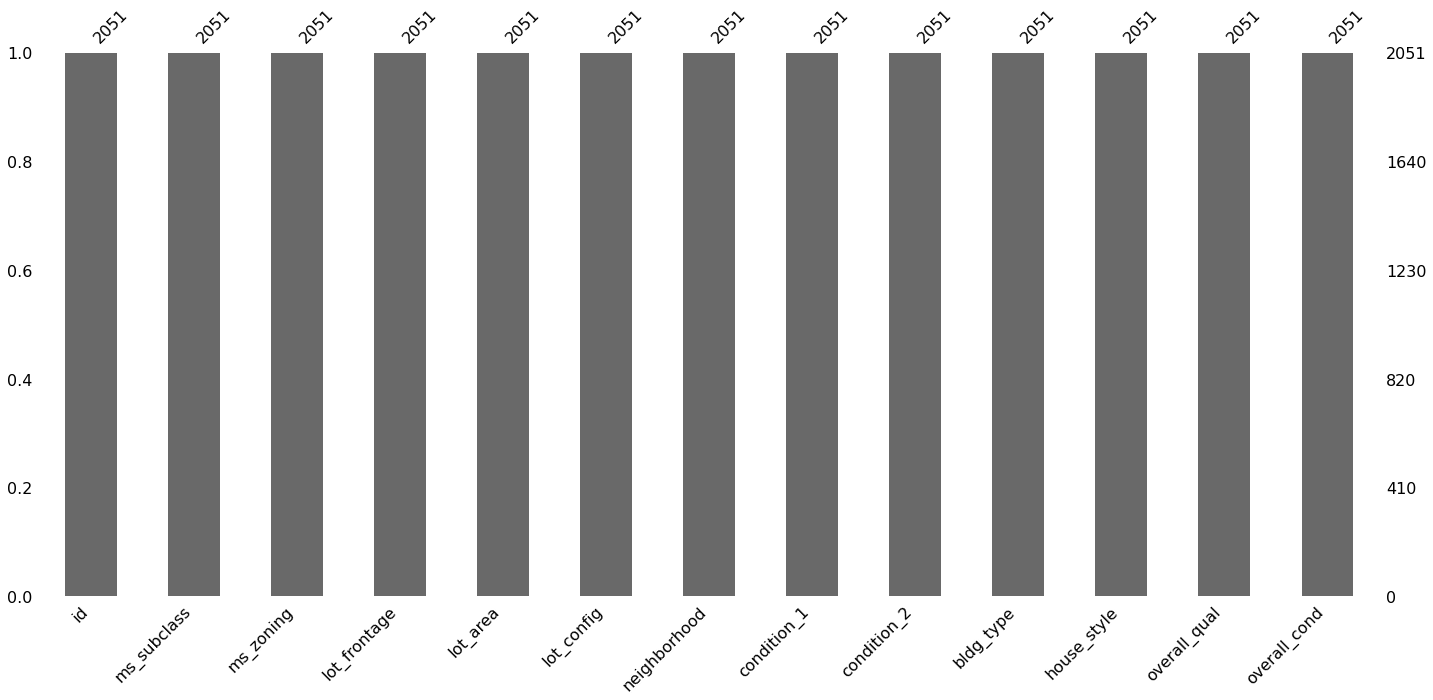

In [68]:
msno.bar(ames_1st_20)

#### TTD 1st 20 columns [ABOVE]

##### delete columns (Initial Qualitative Decisions. Quantitative Drops may be made later.)
* [X] 'alley' column because vast majority are missing values and it is not that important.
* [X] lot_shape (1295 for reg and 692 for IR1 the rest only comprise 55 and 9)
* [X] eliminate street. Only 7 gravel compared to 2044 paved. 
* [X] land_contour. 1843 for lvl. 208 for all other 3 categories combined. 
* [X] utilities. 2049 for allpub. 2 total for other 2 categories.
* [X] land slope. 1954 for Gtl and 98 for other 2. 
* [X] id because it is essentially an index
* [X] pid because it is a locator id. 

###### Other Cleaning Tasks
* [X] replace null values in frontage with mean of frontage.

In [ ]:
ames

In [69]:
def mean_min_max_std(df):
    # function that takes in a dataframe and returns value_counts for all columns. 
    value_list = []
    for item in df.columns:
        if df[item].dtypes == float or df[item].dtypes == int:
            value_list.append((item.upper(), 
                              f' mean: {df[item].mean()}',
                              f' min: {df[item].min()}',
                              f' max: {df[item].max()}',
                              f' std_dev: {df[item].std()}'))
    return value_list
    

In [70]:
mean_min_max_std(ames_1st_20)

[('ID',
  ' mean: 1474.0336421257923',
  ' min: 1',
  ' max: 2930',
  ' std_dev: 843.9808409219162'),
 ('MS_SUBCLASS',
  ' mean: 57.00877620672843',
  ' min: 20',
  ' max: 190',
  ' std_dev: 42.824222926774674'),
 ('LOT_FRONTAGE',
  ' mean: 69.05520046484634',
  ' min: 21.0',
  ' max: 313.0',
  ' std_dev: 21.30635718661978'),
 ('LOT_AREA',
  ' mean: 10065.20819112628',
  ' min: 1300',
  ' max: 159000',
  ' std_dev: 6742.488909496557'),
 ('OVERALL_QUAL',
  ' mean: 6.1121404193076545',
  ' min: 1',
  ' max: 10',
  ' std_dev: 1.4262705424542637'),
 ('OVERALL_COND',
  ' mean: 5.562164797659678',
  ' min: 1',
  ' max: 9',
  ' std_dev: 1.104497234325801')]

TTD EDA 1st 20
* [X] since the numerical values in 'ms_subclass is a classification system. Turn datatype into string object. 

In [71]:
ames_1st_20['ms_subclass'] = ames_1st_20['ms_subclass'].astype(str)

In [72]:
ames_1st_20.dtypes

id                int64
ms_subclass      object
ms_zoning        object
lot_frontage    float64
lot_area          int64
lot_config       object
neighborhood     object
condition_1      object
condition_2      object
bldg_type        object
house_style      object
overall_qual      int64
overall_cond      int64
dtype: object

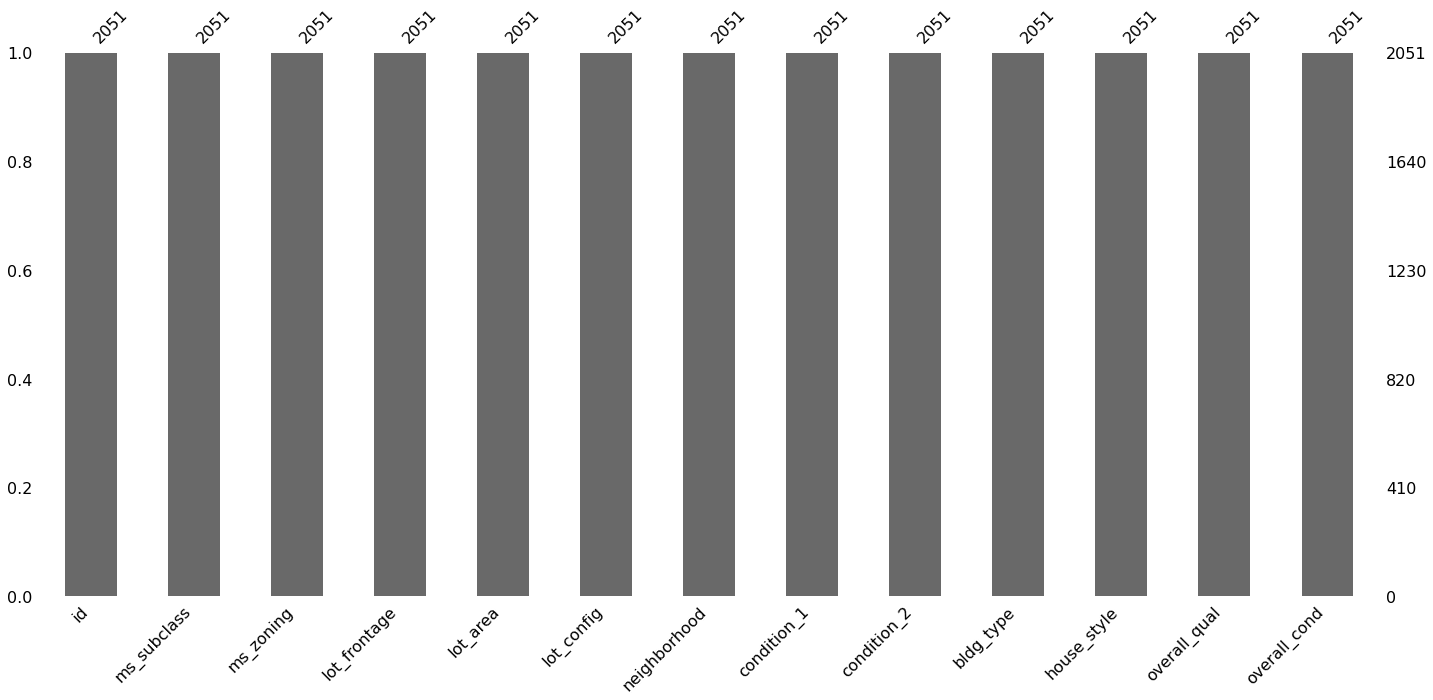

In [73]:
msno.bar(ames_1st_20)

# Initial cleaning 1st 20 columns complete
________________________________________________

# Begin Cleaning on 2nd 20 Columns

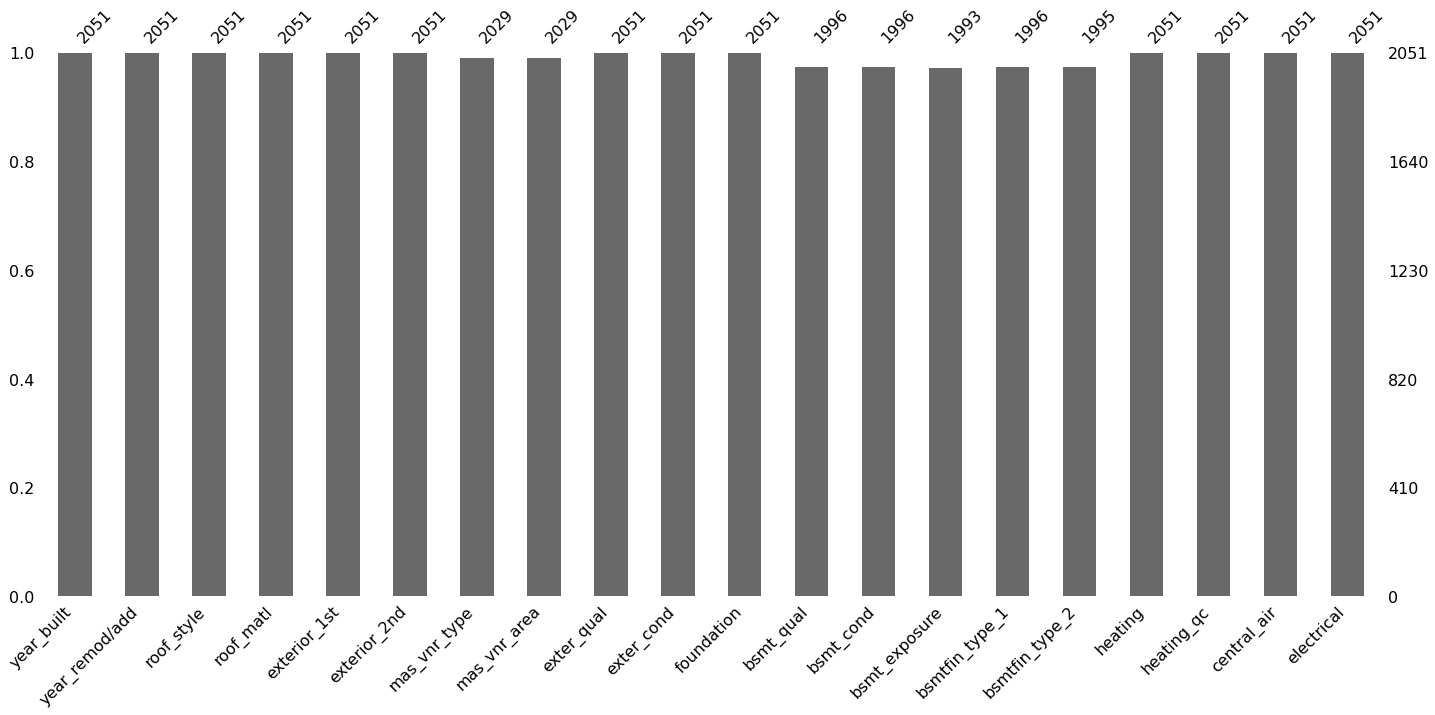

In [74]:
msno.bar(ames_2nd_20);

In [75]:
# call function from above to print all value_counts
mass_value(ames_2nd_20)

['YEAR_BUILT',
 2005    102
 2006     99
 2007     78
 2004     72
 2003     64
        ... 
 1911      1
 1893      1
 1885      1
 1879      1
 1872      1
 Name: year_built, Length: 113, dtype: int64,
 'YEAR_REMOD/ADD',
 1950    262
 2006    139
 2007    123
 2005    100
 2004     83
        ... 
 1952      9
 2010      8
 1983      7
 1981      6
 1982      3
 Name: year_remod/add, Length: 61, dtype: int64,
 'ROOF_STYLE',
 Gable      1619
 Hip         397
 Flat         13
 Gambrel      12
 Mansard       7
 Shed          3
 Name: roof_style, dtype: int64,
 'ROOF_MATL',
 CompShg    2025
 Tar&Grv      15
 WdShngl       5
 WdShake       4
 Membran       1
 ClyTile       1
 Name: roof_matl, dtype: int64,
 'EXTERIOR_1ST',
 VinylSd    724
 MetalSd    331
 HdBoard    300
 Wd Sdng    276
 Plywood    152
 CemntBd     90
 BrkFace     64
 WdShing     45
 AsbShng     33
 Stucco      27
 BrkComm      3
 Stone        2
 CBlock       2
 ImStucc      1
 AsphShn      1
 Name: exterior_1st, dtype: in

In [76]:
drp = ['roof_matl', 'exterior_2nd',
       'bsmtfin_type_2', 'roof_style']

In [77]:
ames_2nd_20.drop(columns = drp, inplace = True)

Columns to Remove
* [X] roof_style. gable 1619 all other 5 columns = 434
* [X] roof matl. 2025 values are same compShg
* [X] exterior_2nd because it is identical to exterior_1st.
* [X] bsmtfin_type_2 seems to be mostly unfinished.


Close to dropping but decided to keep
* [ ] remove mas_vnr_area because most values are zero
* [ ] remove exter_qual because most values are good to average. 
* [ ] remove exter_cond because most values are good to average. 
* [ ] remove basement_qual because most values are good to average. 
* [ ] remove basement_cond because nearly all values are average. 
* [ ] remove bsmt_exposure because more than half the values have no exposure and the ones that do have either minimum exposure or are of average condition. 

# Finish Cleaning 2nd Set of Columns
_______________________

# Begin Cleaning 3rd Set of Columns

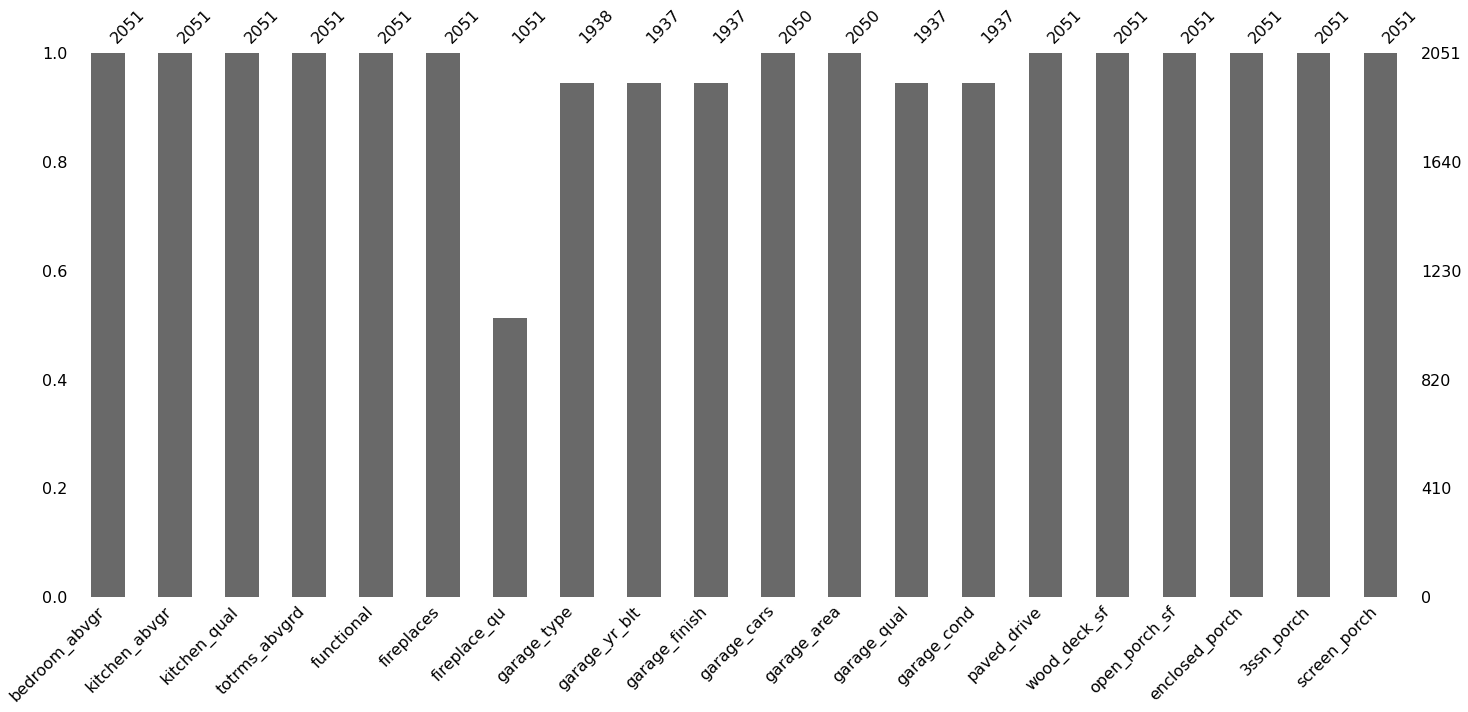

In [78]:
msno.bar(ames_3rd_20);

In [79]:
#call function from above printing all value counts for all columns
mass_value(ames_3rd_20)

['BEDROOM_ABVGR',
 3    1108
 2     544
 4     265
 1      75
 5      41
 6      12
 0       5
 8       1
 Name: bedroom_abvgr, dtype: int64,
 'KITCHEN_ABVGR',
 1    1960
 2      88
 0       2
 3       1
 Name: kitchen_abvgr, dtype: int64,
 'KITCHEN_QUAL',
 TA    1047
 Gd     806
 Ex     151
 Fa      47
 Name: kitchen_qual, dtype: int64,
 'TOTRMS_ABVGRD',
 6     597
 7     475
 5     407
 8     228
 4     146
 9      98
 10     49
 11     22
 12     13
 3      12
 15      1
 13      1
 14      1
 2       1
 Name: totrms_abvgrd, dtype: int64,
 'FUNCTIONAL',
 Typ     1915
 Min2      42
 Min1      42
 Mod       29
 Maj1      12
 Maj2       7
 Sev        2
 Sal        2
 Name: functional, dtype: int64,
 'FIREPLACES',
 0    1000
 1     898
 2     146
 3       6
 4       1
 Name: fireplaces, dtype: int64,
 'FIREPLACE_QU',
 Gd    523
 TA    407
 Fa     59
 Po     31
 Ex     31
 Name: fireplace_qu, dtype: int64,
 'GARAGE_TYPE',
 Attchd     1213
 Detchd      536
 BuiltIn     132
 Basment      2

In [80]:
pd.DataFrame(ames_3rd_20.corr(), columns = ['garage_cars', 'garage_area'])

,garage_cars,garage_area
bedroom_abvgr,0.085918,0.069940
kitchen_abvgr,-0.034496,-0.068536
totrms_abvgrd,0.368034,0.341143
fireplaces,0.310687,0.291655
garage_yr_blt,0.579623,0.552069
garage_cars,1.000000,0.893180
garage_area,0.893180,1.000000
wood_deck_sf,0.240721,0.245513
open_porch_sf,0.215364,0.247222
enclosed_porch,-0.139608,-0.112353


Garage cars and area are too correlated so I am dropping area. I feel area is better because most people look to number of cars as the key measurement for a good garage. 

In [81]:
ames_3rd_20.drop(columns = ['garage_area',  'garage_qual', 'garage_cond', 'fireplace_qu'], inplace = True)

In [82]:
ames_3rd_20.head()

,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch
0,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,Y,0,44,0,0,0
1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,Y,0,74,0,0,0
2,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,Y,0,52,0,0,0
3,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,Y,100,0,0,0,0
4,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,N,0,59,0,0,0


Columns to Remove
* [X] fireplace_qu because most values are null or of fair or good quality. There's already a column for indicating existence of fireplace. 
* [X] garage_cond. nearly all values are average
* [X] garage_qual. nearly all values are average and nearly identical to garage_cond
* [X] garage_area. Garage area and cars is highly correlated. Keeping cars and dropping area because I think cars value is marketed more to home buyers and likely corresponds to area. 

ALmost but didn't 
* [X] paved_drive. nearly all values are less but leaving in because I feel a paved driveway is important to people. 

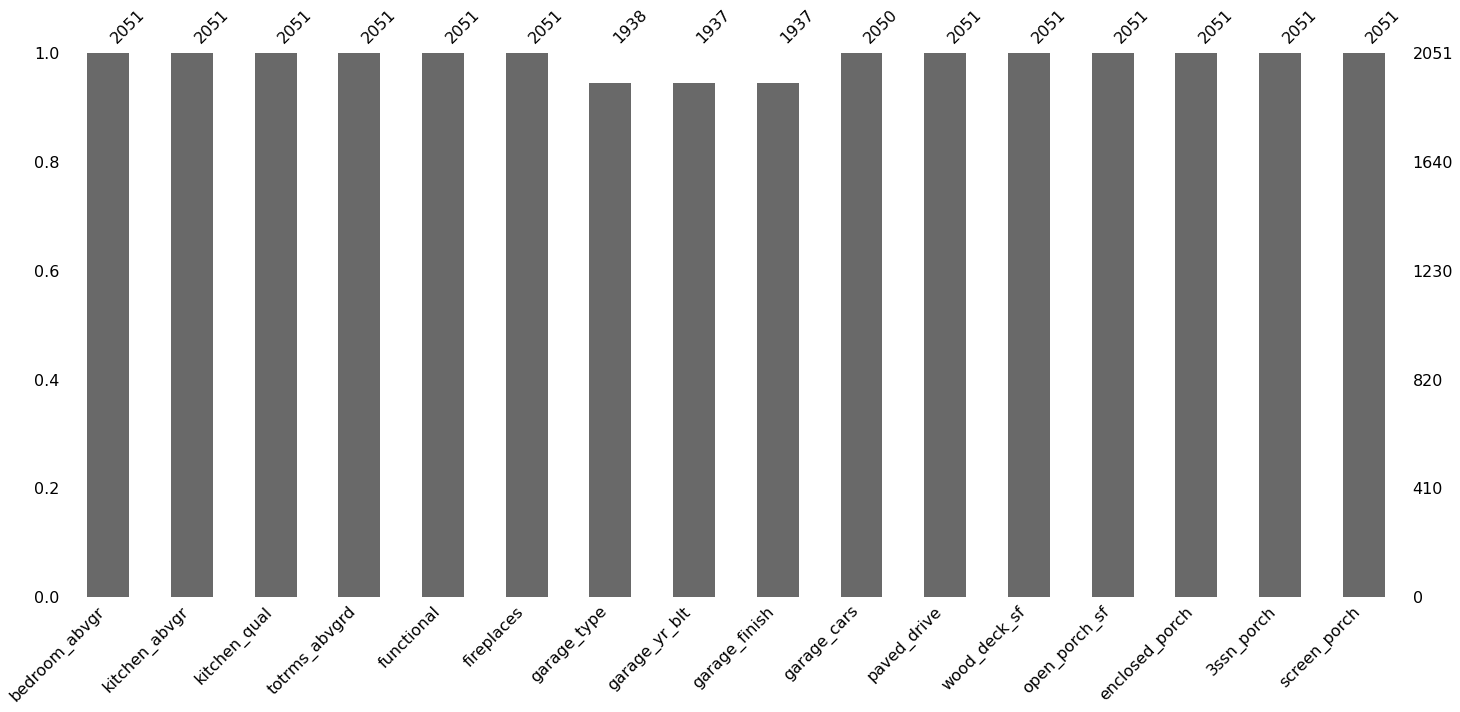

In [83]:
msno.bar(ames_3rd_20);


# Finish Cleaning 3rd Set of Columns
________________________

# Begin Cleaning 4th Set of Columns

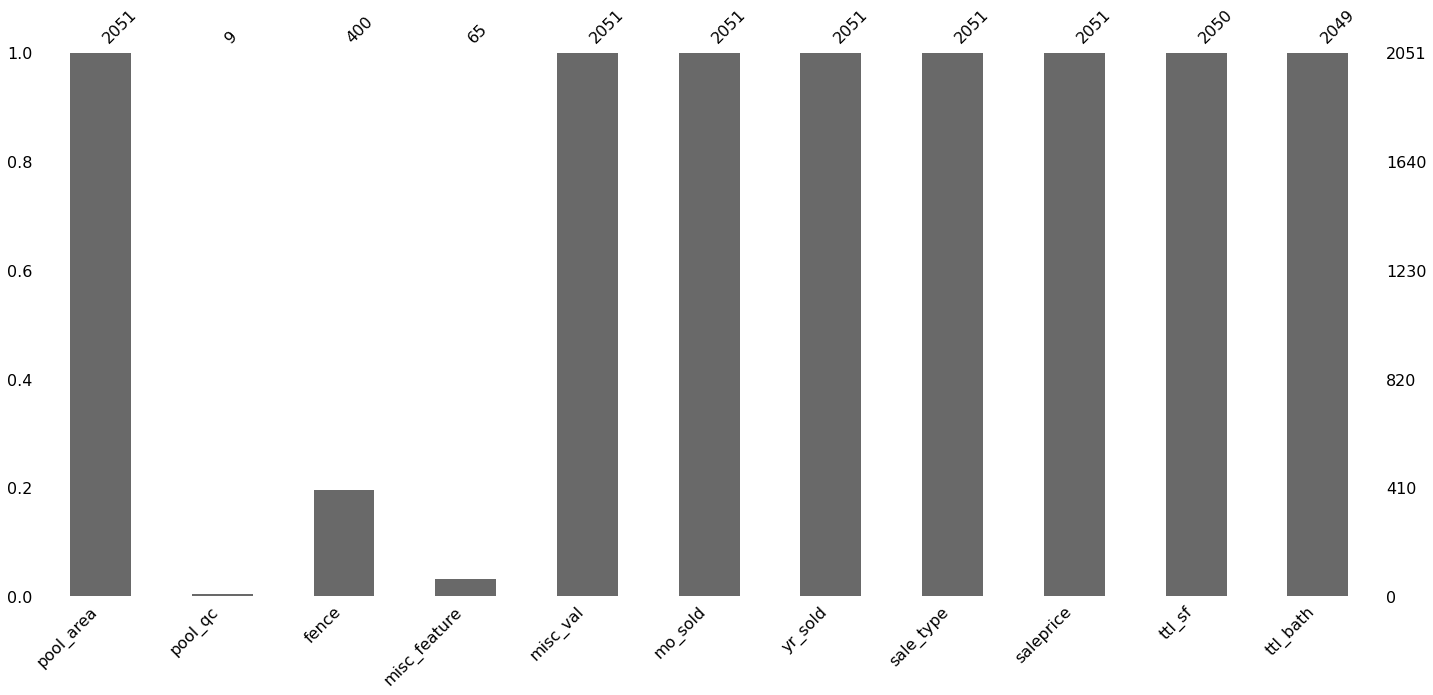

In [84]:
msno.bar(ames_4th_20);

#### Value Counts for all 20 columns

In [85]:
mass_value(ames_4th_20)

['POOL_AREA',
 0      2042
 561       1
 519       1
 800       1
 738       1
 648       1
 576       1
 480       1
 368       1
 228       1
 Name: pool_area, dtype: int64,
 'POOL_QC',
 Gd    4
 Fa    2
 TA    2
 Ex    1
 Name: pool_qc, dtype: int64,
 'FENCE',
 MnPrv    227
 GdPrv     83
 GdWo      80
 MnWw      10
 Name: fence, dtype: int64,
 'MISC_FEATURE',
 Shed    56
 Gar2     4
 Othr     3
 TenC     1
 Elev     1
 Name: misc_feature, dtype: int64,
 'MISC_VAL',
 0        1986
 400        12
 500         8
 600         6
 2000        5
 450         5
 700         4
 2500        2
 4500        2
 3000        2
 1200        2
 80          1
 8300        1
 12500       1
 460         1
 300         1
 54          1
 3500        1
 480         1
 650         1
 800         1
 900         1
 1150        1
 1300        1
 1500        1
 6500        1
 455         1
 17000       1
 Name: misc_val, dtype: int64,
 'MO_SOLD',
 6     352
 7     303
 5     257
 4     208
 3     168
 8     16

In [86]:
ames_4th_20.drop(columns = [ 
    'pool_qc', 'misc_feature', 
    'fence'], inplace = True)

Columns to Drop


* [X] pool_area. there are only 9 pools. I'm taking all pool columns out. 
* [X] pool_qc. see above
* [X] misc_feature. features are too vague or rare to be categorized. 
* [X] fence. too many unknown values

Columns I decided to leave based on judgement:
    
   
    * misc_value. keeping these becaue the values seem to be estimate dollar values of the misc features which could add ot price. 

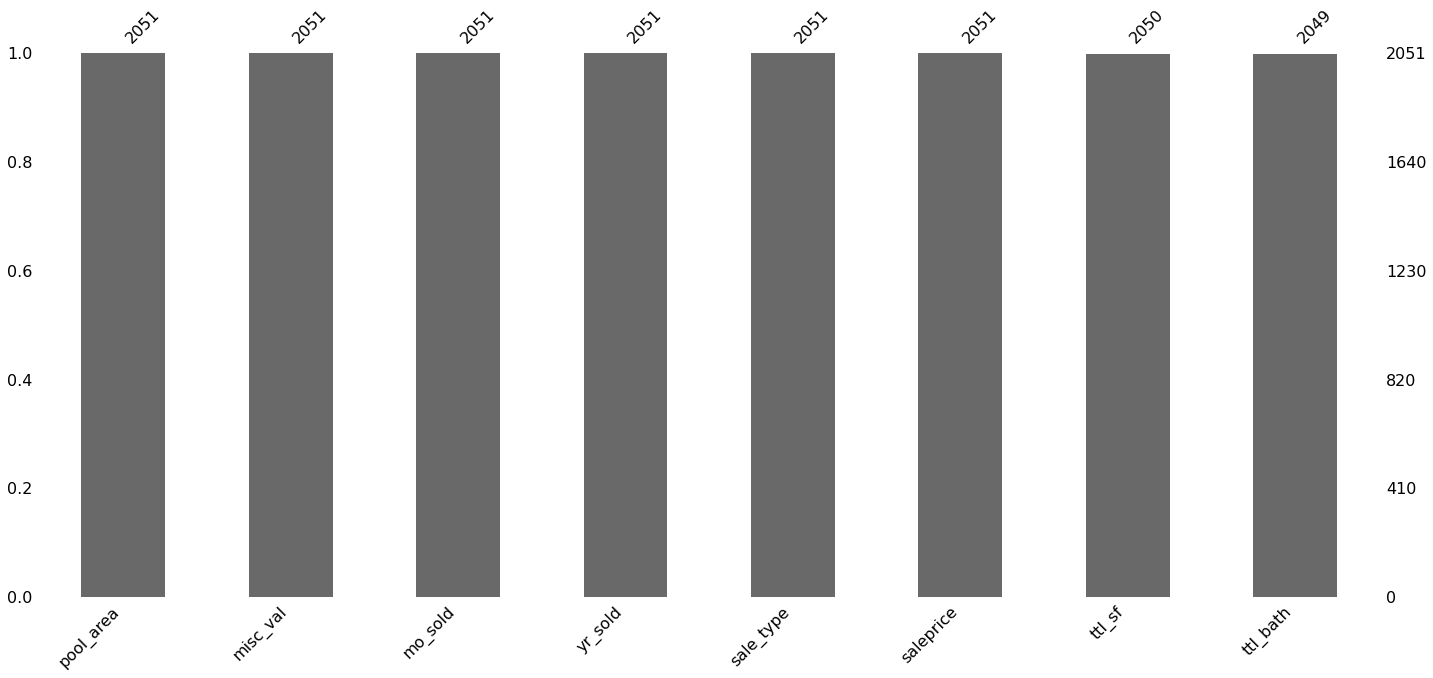

In [87]:
msno.bar(ames_4th_20);

# Finish Cleaning 4th Set of 20

In [88]:
#create an initially cleaned dataframe
ames_ic = pd.concat([ames_1st_20, ames_2nd_20, ames_3rd_20, ames_4th_20], axis = 1)

In [128]:
ames_ic.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,...,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ttl_sf,ttl_bath
0,60,RL,69.0552,13517,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,...,0,0,0,0,3,2010,WD,130500,2204.0,2.5
1,60,RL,43.0000,11492,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,...,0,0,0,0,4,2009,WD,220000,3035.0,3.5
2,20,RL,68.0000,7922,Inside,NAmes,Norm,Norm,1Fam,1Story,...,0,0,0,0,1,2010,WD,109000,2114.0,2.0
3,60,RL,73.0000,9802,Inside,Timber,Norm,Norm,1Fam,2Story,...,0,0,0,0,4,2010,WD,174000,1828.0,2.5
4,50,RL,82.0000,14235,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,...,0,0,0,0,3,2010,WD,138500,2121.0,2.0


In [89]:
ames_ic.shape

(2051, 53)

In [92]:
#cleaned away over 30 columns
ames_ic.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_config,neighborhood,condition_1,condition_2,bldg_type,...,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ttl_sf,ttl_bath
0,109,60,RL,69.0552,13517,CulDSac,Sawyer,RRAe,Norm,1Fam,...,0,0,0,0,3,2010,WD,130500,2204.0,2.5
1,544,60,RL,43.0000,11492,CulDSac,SawyerW,Norm,Norm,1Fam,...,0,0,0,0,4,2009,WD,220000,3035.0,3.5
2,153,20,RL,68.0000,7922,Inside,NAmes,Norm,Norm,1Fam,...,0,0,0,0,1,2010,WD,109000,2114.0,2.0
3,318,60,RL,73.0000,9802,Inside,Timber,Norm,Norm,1Fam,...,0,0,0,0,4,2010,WD,174000,1828.0,2.5
4,255,50,RL,82.0000,14235,Inside,SawyerW,Norm,Norm,1Fam,...,0,0,0,0,3,2010,WD,138500,2121.0,2.0


In [95]:
#save df to csv
ames_ic.to_csv('../datasets/ames_ic.csv')